In [1]:
from cv2_v2 import *


fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'
clr=color_schema('yellow')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

In [4]:
from cv2_v2 import *
fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/68653571067__FCF9D813-5942-4A11-BD7B-0F75D71F1F49.jpg'

img=cv2.imread(fn)#read file

clr=color_schema('green')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

imgray = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

v=cv2.drawContours(value, contours, -1, (0,255,0), 3)

font = cv2.FONT_HERSHEY_COMPLEX

# Going through every contours found in the image.
for cnt in contours :
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
  
    # draws boundary of contours.
    cv2.drawContours(value, [approx], 0, (0, 0, 255), 5) 
  
    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel() 
    i = 0
  
    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
  
            # String containing the co-ordinates.
            string = str(x) + " " + str(y) 
  
            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0)) 
            else:
                # text on remaining co-ordinates.
                #cv2.putText(img, string, (x, y), 
                          #font, 0.5, (0, 255, 0)) 
                pass
        i = i + 1

#new=img   

print(cv2)
        
moment_display(img)

#moment_display(new)

<module 'cv2' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/__init__.py'>


0

# Consolidated def functions with results 

#### Phase 1: Translating picture of rock climbing wall to x-y graph of invidual center holds
    1.Image is ingested
    2.Image is changed to RGB/RBG to HSV in order to better differentiate the holds/objects of interest
    3.Predisposed color ranges have been coded and can be chosen in order to help user 
    4.Additional sliders can be used to change the hue,saturation,and value in order to best isolate the color-specific holds of interest from all other holds and wall
    5.Once appropriate holds are isolated and result is appropriate to user, a k-means classificaiton is used to find the center of each hold
    6. The number of holds need to be inputted in order to properly determine the center (would be best to not have to do that)
    7. Centers of each hold is then visualized on a separate x-y axis in order to start phase.
    
#### Phase 2: Using the center holds and finding best hand and feet path based on human biomechanics 
    1. Create human cody constraints 
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


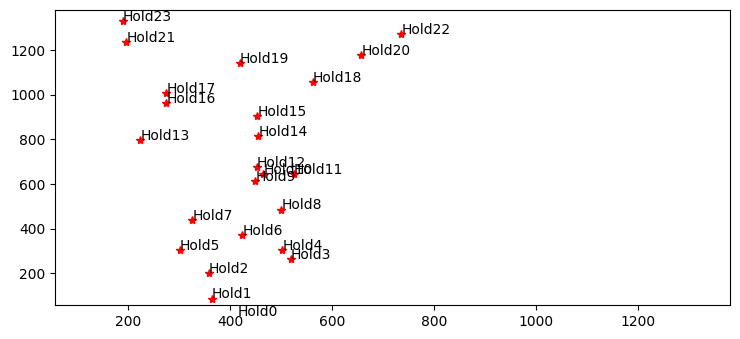

[562.71, 1059.12, 326.27, 438.82, 525.24, 646.93, 274.98, 1006.76, 657.45, 1177.59, 364.68, 86.84, 196.72, 1236.67, 502.35, 303.71, 455.12, 815.16, 224.31, 796.38, 419.56, 1143.13, 736.07, 1274.25, 500.79, 485.72, 452.34, 675.85, 424.47, 370.83, 358.29, 199.48, 465.55, 645.94, 190.39, 1330.17, 453.68, 902.74, 301.83, 305.0, 519.3, 262.61, 274.77, 962.45, 414.4, 6.6, 449.24, 615.33]


In [14]:
from cv2_v2 import *
#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
#image='245379234_4650402895027244_263010799927765806_n.jpeg'
image='rc_sample_3.jpeg'

fn=f+image
img=cv2.imread(fn)#read file

clr=color_schema('blue')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

img,coordinates=trace_pathx(path=fn,value=value)#

#centroids=find_centroids(coordinates,n_clusters=23) #static finding centroids 

centroids=find_holds(path=fn,coordinates=coordinates)#dynamically finding centroids

#centroids
simple_plot(centroids)

print(centroids)



In [8]:
f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result) 
font = cv2.FONT_HERSHEY_COMPLEX

x=centroids[::2] 
y=centroids[1::2] 

for i,j in zip(x,y):
    
    cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

moment_display(img)

0

In [8]:
import time

f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result)
cv2.namedWindow('image')
cv2.createTrackbar('Number','image',5,49,empty)
font = cv2.FONT_HERSHEY_COMPLEX


while(True):

        # for button pressing and changing
    k = cv2.waitKey(1) & 0xFF
        #once "ESC" button is pressed, loop breaks (true for linux)
    if k == 27:

        break
        #retrieving the min max values based on track bar position 
    n= cv2.getTrackbarPos('Number', 'image')
    if n ==-1:
        pass
    else:
        centroids=find_centroids(coordinates,n_clusters=n)

    x=centroids[::2] 
    y=centroids[1::2] 
    for i,j in zip(x,y):
    
        cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

    cv2.imshow('image',img)
    img=cv2.imread(path_result)
    #time.sleep(0.5)
cv2.destroyAllWindows();cv2.waitKey(1);

In [15]:


f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
image='rc_sample_3.jpeg'
path_result=f+image
img=cv2.imread(path_result) 
cv2.namedWindow('result')
cv2.createTrackbar('Number','result',1,49,empty)
cv2.imshow('result',img)
    
cv2.waitKey(0);cv2.destroyAllWindows();cv2.waitKey(1);

In [12]:
def find_holds(path,coordinates):

    img=cv2.imread(path)
    cv2.namedWindow('image')
    cv2.createTrackbar('Number','image',5,49,empty)
    font = cv2.FONT_HERSHEY_COMPLEX


    while(True):

            # for button pressing and changing
        k = cv2.waitKey(1) & 0xFF
            #once "ESC" button is pressed, loop breaks (true for linux)
        if k == 27:

            break
            #retrieving the min max values based on track bar position 
        n= cv2.getTrackbarPos('Number', 'image')
        if n ==-1:
            pass
        else:
            centroids=find_centroids(coordinates,n_clusters=n)

        x=centroids[::2] 
        y=centroids[1::2] 
        for i,j in zip(x,y):

            cv2.putText(img, "X", (int(i), int(j)), font, 0.8, (30, 40, 0)) 

        cv2.imshow('image',img)
        img=cv2.imread(path_result)
        #time.sleep(0.5)
    cv2.destroyAllWindows();cv2.waitKey(1);
    
    return centroids

In [39]:
x=[0,4,4,1]
y=[9,2,5,1]

k = sorted(set(zip(x,y)))
a=zip(x,y)
b=sorted(set(a))

for i, j in sorted(set(zip(x,y))): 
    #plt.text(i, j+0.5, '({}, {})'.format(i, j))
    #plt.text(i, j+0.5, 'Hold'+str(num) )
    print('{},{}'.format(i,j))
    #k.append((i,j))# turn into tu




0,9
1,1
4,2
4,5


# Creating body restrictions in order recreate body
#    3. Constraints:
        a.Two feet and two hands (4 points of contact possible),
    ignoring complexity of using other body parts as well (e.g.:knee)
        b. Feet can only be at the same height or lower than hands
    (to accomodate for lower levels of climbing and keep model simpler)
        c. Only one foot can be at the same level as the hands
        d. You can have two points on one hold
        e. start position is input value
        f. end position is input value (two hands)
        

[(6.6, 414.4), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]


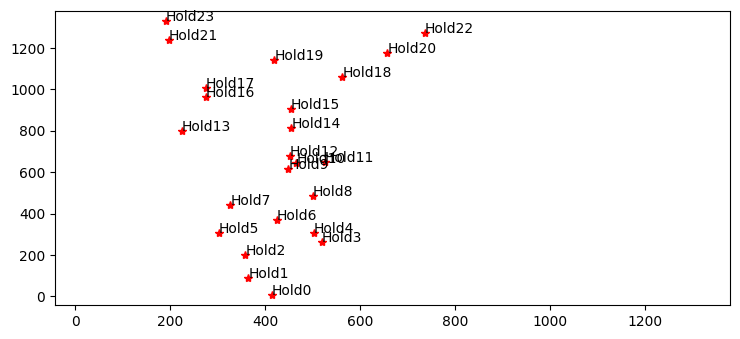

In [6]:
from cv2_v2 import *
import time

centroids=[562.71, 1059.12, 326.27, 438.82, 525.24, 646.93, 274.98, 1006.76, 657.45, 1177.59, 364.68, 86.84, 196.72, 1236.67, 502.35, 303.71, 455.12, 815.16, 224.31, 796.38, 419.56, 1143.13, 736.07, 1274.25, 500.79, 485.72, 452.34, 675.85, 424.47, 370.83, 358.29, 199.48, 465.55, 645.94, 190.39, 1330.17, 453.68, 902.74, 301.83, 305.0, 519.3, 262.61, 274.77, 962.45, 414.4, 6.6, 449.24, 615.33]
x=centroids[::2] 
y=centroids[1::2] 
wall=sorted(set(zip(y,x)))
print(wall)
simple_plot(centroids)

In [51]:

start=(86.84, 364.68)
end=(1143.13, 419.56)

wall = [(6.6, 414.4), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]


#iterate through tuple and only action happens at start and breaks at end of tuple desired
for w in wall:
    if w >= start and w != end:
        print(w,'RIGHT HAND'.format(w))
        #{action}
    #time.sleep(0.5)
    elif w ==end:
        break



(86.84, 364.68) RIGHT HAND
(199.48, 358.29) RIGHT HAND
(262.61, 519.3) RIGHT HAND
(303.71, 502.35) RIGHT HAND
(305.0, 301.83) RIGHT HAND
(370.83, 424.47) RIGHT HAND
(438.82, 326.27) RIGHT HAND
(485.72, 500.79) RIGHT HAND
(615.33, 449.24) RIGHT HAND
(645.94, 465.55) RIGHT HAND
(646.93, 525.24) RIGHT HAND
(675.85, 452.34) RIGHT HAND
(796.38, 224.31) RIGHT HAND
(815.16, 455.12) RIGHT HAND
(902.74, 453.68) RIGHT HAND
(962.45, 274.77) RIGHT HAND
(1006.76, 274.98) RIGHT HAND
(1059.12, 562.71) RIGHT HAND


In [139]:
import math
    

start=(1236.67, 196.72) #change to current hold and pop previous node

end=(1330.17, 190.39) 

wall = [(6.6, 414.4), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
wall_c=[(1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]

length=250
potential_holds=[]

#iterate through tuple and only action happens at start and breaks at end of tuple desired
for w in wall_c:
    print(math.dist(start,w))
    if  w > start and math.dist(start,w)<=length:
        #print(w,'POTENTIAL HOLD'.format(w))
        potential_holds.append(w)
        #{action}
    #time.sleep(0.5)
    elif math.dist(start,w)>length and w==wall_c[-1] :
        break
        
potential_holds

0.0
540.6576355698678
93.71402723178639


[(1330.17, 190.39)]

In [157]:
tp=[(1,1),(2,2),(3,3),(4,4),(5,5)]
L=[1,2,3,4,5]
R=[3,4,5]

validL=[]

min(R)
for i in L:
    if i <= min(R):
        validL.append(i)
        print(tp[L.index(i)])

print(validL)

validR=[]

min(R)
for i in R:
    if i >= min(L):
        validR.append(i)

print(validR)

#tp[0]
#valid
#print(min(R))

(1, 1)
(2, 2)
(3, 3)
[1, 2, 3]
[3, 4, 5]


In [158]:
wall = [(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]

for w in wall:
    print(w)
    
    

(6.6, 414.4)
(80.84, 340.68)
(86.84, 364.68)
(199.48, 358.29)
(262.61, 519.3)
(303.71, 502.35)
(305.0, 301.83)
(370.83, 424.47)
(438.82, 326.27)
(485.72, 500.79)
(615.33, 449.24)
(645.94, 465.55)
(646.93, 525.24)
(675.85, 452.34)
(796.38, 224.31)
(815.16, 455.12)
(902.74, 453.68)
(962.45, 274.77)
(1006.76, 274.98)
(1059.12, 562.71)
(1143.13, 419.56)
(1177.59, 657.45)
(1236.67, 196.72)
(1274.25, 736.07)
(1330.17, 190.39)


In [30]:
from climbing_biomechanics import *

start=(6.6, 414.4) #change to current hold and pop previous node
end=(199.48, 358.29)
wall = [(6.6, 414.4), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35)]#, (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]


#starting position, current is same as start and exisitng holds is the same as wall
rh=Appendage(start=start,end=end,current=start,length=250,existing_holds=wall)
lh=Appendage(start=start,end=end,current=start,length=250,existing_holds=wall)

r=rh.length_constraint()
#print('R potential holds')
#print(r) #print potential holds

#print('R existing holds')
#print(rh.existing_holds) #print rest of holds 

#print('\n')

l=lh.length_constraint()
#print('L potential holds')
#print(l) #print potential holds

#print('L existing holds')
#print(lh.existing_holds) #print rest of holds

l,r=cross_constraint(lh=l,rh=r)

#print('\n')
#print('R potential holds')
#print(r)

#print('L potential holds')
#print(l)


rh.next_move(r)
#print('next move rh')
#print(rh.current)
print('potential holds')
print(l)
print('existing holds')
print(lh.existing_holds)
print(rh.exisitng_holds)

lh.next_move(l)

print('next move lh ')
print(lh.current)

test
(199.48, 358.29)
potential holds
[(86.84, 364.68)]
existing holds
[(6.6, 414.4), (86.84, 364.68), (262.61, 519.3), (303.71, 502.35)]


AttributeError: 'Appendage' object has no attribute 'exisitng_holds'

In [2]:
from climbing_biomechanics import *
from cv2_v2 import *

wall = [(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]

rh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)
lh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)

rh.start


#lh.length_constraint()
#lh.next_move(a)
#rh.next_move(rh.length_constraint())
#print(lh.existing_holds)
#print(rh.existing_holds)
print('lh1')
lh.print_attr()
l,r=cross_constraint(lh.length_constraint(), rh.length_constraint() )
lh.next_move(l)

print('rh1')
rh.print_attr()
rh.next_move(r)

l,r=cross_constraint(lh.length_constraint(), rh.length_constraint() )


print('lh2')
lh.print_attr()

print('rh2')
rh.print_attr()

lh.next_move(l)
print('lh3')
lh.print_attr()

rh.next_move(r)
print('rh3')
rh.print_attr()
#lh.current 

    

lh1
start:(6.6, 414.4) 
end:(1274.25, 736.07) 
current:(6.6, 414.4) 
existing_holds:[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
[(80.84, 340.68)]
rh1
start:(6.6, 414.4) 
end:(1274.25, 736.07) 
current:(6.6, 414.4) 
existing_holds:[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13,

0

In [2]:
from climbing_biomechanics import *
from cv2_v2 import *
wall = [(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]

rh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)
lh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)

i=0
while rh.current != rh.end and lh.current !=lh.end:
    i+=1
    print(rh.existing_holds)
    print('right hand length')
    print(rh.length_constraint())
    l,r=cross_constraint(lh=lh.length_constraint(),rh= rh.length_constraint() )
    
    print('lh{}'.format(i))
    lh.next_move(l)
    lh.print_attr()


    print('rh{}'.format(i))
    rh.next_move(r)
    rh.print_attr()
    
    

    #l,r=cross_constraint(lh.length_constraint(), rh.length_constraint() )

[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
right hand length
wall
[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
start
(6.6, 414.4)
[(80.84, 340.68), (86.84, 364.68), (199.48, 358.29)]
wall


In [3]:
from climbing_biomechanics import *
from cv2_v2 import *
wall = [(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]

rh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)
lh=Appendage(start=(6.6, 414.4),end=(1274.25, 736.07),current=(6.6, 414.4),length=250,existing_holds=wall)


def move(rh,lh):    
    i=0
    while rh.current != rh.end and lh.current !=lh.end:
        i+=1
        print(rh.existing_holds)
        print('right hand length')
        print(rh.length_constraint())
        l,r=cross_constraint(lh=lh.length_constraint(),rh= rh.length_constraint() )

        print('lh{}'.format(i))
        lh.next_move(l)
        lh.print_attr()


        print('rh{}'.format(i))
        rh.next_move(r)
        rh.print_attr()
        
    return 0


In [4]:
move(rh,lh)

[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
right hand length
wall
[(6.6, 414.4), (80.84, 340.68), (86.84, 364.68), (199.48, 358.29), (262.61, 519.3), (303.71, 502.35), (305.0, 301.83), (370.83, 424.47), (438.82, 326.27), (485.72, 500.79), (615.33, 449.24), (645.94, 465.55), (646.93, 525.24), (675.85, 452.34), (796.38, 224.31), (815.16, 455.12), (902.74, 453.68), (962.45, 274.77), (1006.76, 274.98), (1059.12, 562.71), (1143.13, 419.56), (1177.59, 657.45), (1236.67, 196.72), (1274.25, 736.07), (1330.17, 190.39)]
start
(6.6, 414.4)
[(80.84, 340.68), (86.84, 364.68), (199.48, 358.29)]
wall


IndexError: list index out of range

In [ ]:
##1. Length constraint- returns all holds that can be reached based on arm length
##2. Cross constraint-Left and right hand are inputted and potential holds based on 
##   values not crossing, are returned for LH and RH
##3. Next move- takes a value at random from the potential holds and changes self.current